In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sb
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

In [ ]:
dataset = pd.read_csv('parkinsons.csv')

In [ ]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


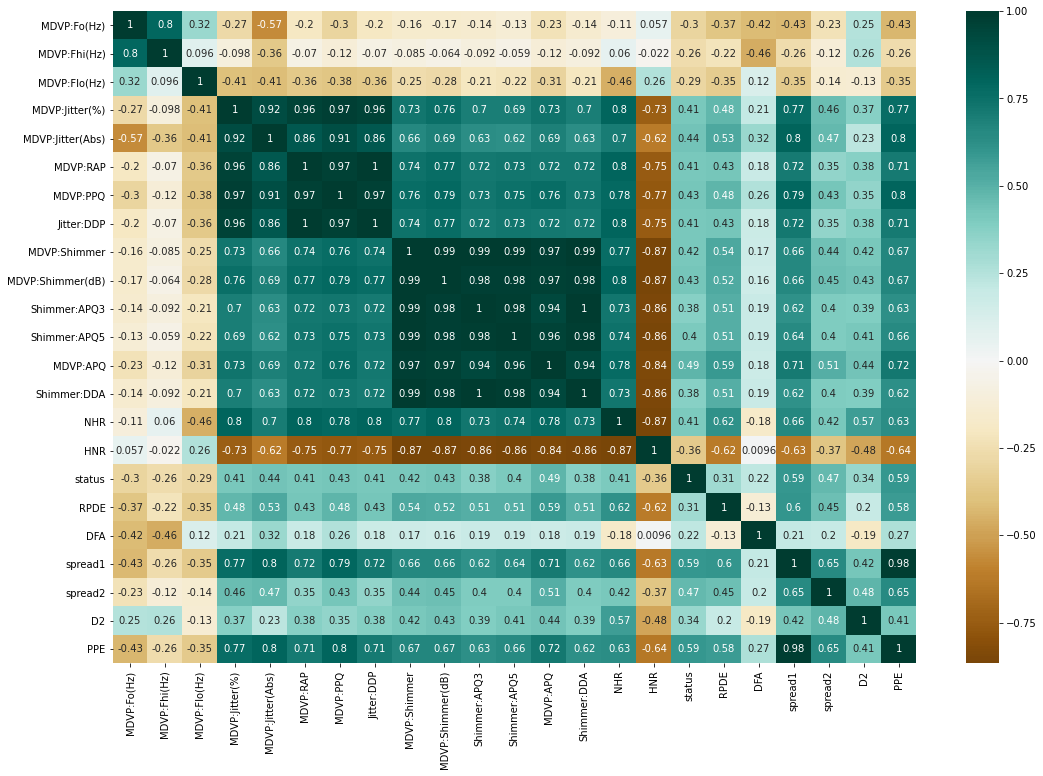

In [ ]:
corr = dataset.corr(method = 'spearman')
plt.figure(figsize=(18,12))
sb.heatmap(corr, annot = True, cmap= 'BrBG', center = 0)
plt.show()

In [ ]:
correlation_values=dataset.corr()['status']
correlation_values.abs().sort_values(ascending=True)

MDVP:Fhi(Hz)        0.166136
NHR                 0.189429
DFA                 0.231739
Jitter:DDP          0.266646
MDVP:RAP            0.266668
MDVP:Jitter(%)      0.278220
MDVP:PPQ            0.288698
RPDE                0.308567
MDVP:Jitter(Abs)    0.338653
D2                  0.340232
Shimmer:DDA         0.347608
Shimmer:APQ3        0.347617
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ5        0.351148
HNR                 0.361515
MDVP:APQ            0.364316
MDVP:Shimmer        0.367430
MDVP:Flo(Hz)        0.380200
MDVP:Fo(Hz)         0.383535
spread2             0.454842
PPE                 0.531039
spread1             0.564838
status              1.000000
Name: status, dtype: float64

In [ ]:

features=dataset.drop(columns=['name','status', 'NHR', 'Jitter:DDP','MDVP:RAP','MDVP:Jitter(%)','MDVP:PPQ', 'RPDE','MDVP:Jitter(Abs)','D2','Shimmer:DDA','Shimmer:APQ3'], axis=1)
labels=dataset['status']

In [ ]:

print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [ ]:

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:

model=XGBClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)

[22:35:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
score=accuracy_score(y_test,pred)
score

0.9487179487179487

In [ ]:
confusion_matrix(y_test,pred)

array([[ 6,  1],
       [ 1, 31]], dtype=int64)

In [ ]:
tn, fp, fn,tp=confusion_matrix(y_test,pred).ravel()

In [ ]:
tn

6

In [ ]:
fp

1

In [ ]:
fn

1

In [ ]:
tp

31

In [ ]:
matrix=classification_report(y_test,pred)
print('Classification Report:\n', matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []


In [ ]:
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:57:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:57:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:57:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:57:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [ ]:

y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486
